In [1]:
import os

In [2]:
import pickle
import numpy as np, matplotlib.pyplot as plt

with open("mobile_net_hundred_seeds_results.pickle", 'rb') as f: 
 (META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS) = pickle.load(f)

In [3]:
def all_info_for_approach(META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS, approach):
    
    # plot the ROC curve 

    average_tprs = np.mean(np.array(AVERAGE_TPRS), axis = 0)
    meta_avg_tpr = np.mean(average_tprs, axis = 0) 
    base_fpr = np.linspace(0, 1, 101) 
    
    plt.plot(base_fpr, average_tprs, label = "average of runs")

    std_tpr = np.std(AVERAGE_TPRS, axis=0)
    tprs_upper = np.minimum(np.mean(AVERAGE_TPRS,axis=0) + std_tpr, 1)
    tprs_lower = np.maximum(np.mean(AVERAGE_TPRS,axis=0) - std_tpr, 0)
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=.3, label=r'$\pm$ 1 std. dev.')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = "chance")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{approach} Average ROC Curve')
    plt.legend(loc="lower right")

    plt.savefig(f"seed_plots/{approach} ROC Curve")

    plt.show()


    # receive evaluation for basically everything
    METRICS = []
    for fold_results in np.array_split(META_RESULT_MATRIX, 100):
        """cluster based on cross validtion run"""
        METRICS.append(np.mean(fold_results, axis = 0)) 

    METRICS = np.around(np.array(METRICS), 3)
    print(f"training accuracy : {np.mean(METRICS[:, 0])} +/- {np.std(METRICS[:, 0])}")
    print(f"training precision : {np.mean(METRICS[:, 1])} +/- {np.std(METRICS[:, 1])}")
    print(f"training recall : {np.mean(METRICS[:, 2])} +/- {np.std(METRICS[:, 2])}")
    print(f"training f1 : {np.mean(METRICS[:, 3])} +/- {np.std(METRICS[:, 3])}")
    print(f"validation accuracy : {np.mean(METRICS[:, 4])} +/- {np.std(METRICS[:, 4])}")
    print(f"validation precision : {np.mean(METRICS[:, 5])} +/- {np.std(METRICS[:, 5])}")
    print(f"validation recall : {np.mean(METRICS[:, 6])} +/- {np.std(METRICS[:, 6])}")
    print(f"validation f1 : {np.mean(METRICS[:, 7])} +/- {np.std(METRICS[:, 7])}")
    print(f"average auroc : {np.mean(AVERAGE_AUROCS)} +/- {np.std(AVERAGE_AUROCS)}")

In [4]:
np.array(META_RESULT_MATRIX).shape

(500, 8)

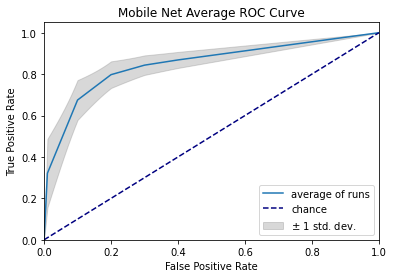

training accuracy : 0.9773099999999999 +/- 0.009105707001655618
training precision : 0.9953799999999999 +/- 0.004424432166956573
training recall : 0.9590499999999998 +/- 0.01706890447568325
training f1 : 0.9764800000000001 +/- 0.009453549597902376
validation accuracy : 0.8497 +/- 0.031478722972827215
validation precision : 0.8957200000000001 +/- 0.042618793976366816
validation recall : 0.8037999999999998 +/- 0.06004631545732011
validation f1 : 0.8391 +/- 0.03658893275295139
average auroc : 0.8497 +/- 0.03147872297282722


In [5]:
all_info_for_approach(META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS, approach = "Mobile Net")

# lets get the data for the mobile net comparison

In [6]:
import pickle 
import numpy as np
import os 

META_RESULT_MATRIX = []
for file_names in os.listdir("performances/"): 
    if not file_names.endswith(".txt"): continue
    with open(f"performances/{file_names}") as f: 
        row = []
        for line in f.readlines():
            row.append(float(line[line.index(':')+1:].strip()))
        META_RESULT_MATRIX.append(row)
    

In [7]:
AVERAGE_AUROCS = np.array(META_RESULT_MATRIX)[:, 8]
META_RESULT_MATRIX = np.array(META_RESULT_MATRIX)[:, :8]
AVERAGE_AUROCS = np.array([np.mean(five_aurocs) for five_aurocs in np.array_split(AVERAGE_AUROCS, 100)])

In [8]:
# last thing: get the average tprs 
TPRS = []
for file_names in os.listdir("tpr_files/"): 
    if not file_names.endswith(".pickle"): continue
    with open(f"tpr_files/" + file_names, "rb") as f :
        TPRS.append(pickle.load(f))


In [9]:
TPRS = np.array(TPRS)
TPRS = np.array([np.mean(five_tprs, axis = 0) for five_tprs in np.array_split(TPRS, 100)])

In [10]:
with open("mobile_net_hundred_seeds_results.pickle", 'wb') as f: 
    pickle.dump((META_RESULT_MATRIX, AVERAGE_AUROCS, TPRS), f)

# lets run p-value tests on all (validation) results for all metrics

In [11]:
import pickle, numpy as np, os
with open("mean_landmark_hundred_seeds_results", 'rb') as f: 
 (MEAN_META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS) = pickle.load(f)


In [25]:
with open("one_landmark_hundred_seeds_results", 'rb') as f: 
 (ONE_META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS) = pickle.load(f)

with open("all_landmarks_hundred_seeds_results", 'rb') as f: 
 (ALL_META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS) = pickle.load(f)

with open("six_landmarks_hundred_seeds_results", 'rb') as f: 
 (SIX_META_RESULT_MATRIX, AVERAGE_AUROCS, AVERAGE_TPRS) = pickle.load(f)

 
with open("mobile_net_hundred_seeds_results.pickle", 'rb') as f: 
    (MB_META_RESULT_MATRIX, AVERAGE_AUROCS, TPRS) = pickle.load(f)

In [27]:
np.std(AVERAGE_AUROCS, axis =0 )

0.03147872297282722

In [15]:
def boil(matrix): 
    matrix = np.array_split(matrix, 100)
    return np.array([np.mean(fold_results, axis = 0) for fold_results in matrix])

In [16]:
MB_META_RESULT_MATRIX, MEAN_META_RESULT_MATRIX, ONE_META_RESULT_MATRIX, ALL_META_RESULT_MATRIX, SIX_META_RESULT_MATRIX = [np.array(mat) for mat in [MB_META_RESULT_MATRIX, MEAN_META_RESULT_MATRIX, ONE_META_RESULT_MATRIX, ALL_META_RESULT_MATRIX, SIX_META_RESULT_MATRIX]]
MB_META_RESULT_MATRIX, MEAN_META_RESULT_MATRIX, ONE_META_RESULT_MATRIX, ALL_META_RESULT_MATRIX, SIX_META_RESULT_MATRIX = list(map(boil, [MB_META_RESULT_MATRIX, MEAN_META_RESULT_MATRIX, ONE_META_RESULT_MATRIX, ALL_META_RESULT_MATRIX, SIX_META_RESULT_MATRIX]))

In [22]:
approaches = ['mean', 'one', 'all', 'six', 'mobile net']
metrics = list(map(lambda x : "validation " + x, ["accuracy", "precision", "recall", "F1"]))
approach_matrix = {approach : matrix for approach, matrix in zip(approaches, [MEAN_META_RESULT_MATRIX, ONE_META_RESULT_MATRIX, ALL_META_RESULT_MATRIX, SIX_META_RESULT_MATRIX, MB_META_RESULT_MATRIX])}

In [23]:
metrics

['validation accuracy',
 'validation precision',
 'validation recall',
 'validation F1']

In [24]:
from scipy.stats import ttest_ind
for i in range(5): 
    for j in range(i + 1, 5): 
        print(f"{approaches[i]} vs {approaches[j]}")
        for k in range(4): # only 4 metrics 
            p_value = ttest_ind(approach_matrix[approaches[i]][:, 4 + k], approach_matrix[approaches[j]][:, 4 + k]).pvalue
            print(f"for {metrics[k]} : {p_value}, statistically significant : {p_value <= 0.005}")
        print("\n")

mean vs one
for validation accuracy : 0.6677298768921249, statistically significant : False
for validation precision : 0.8498462215261376, statistically significant : False
for validation recall : 0.41682879441214116, statistically significant : False
for validation F1 : 0.4992904697063305, statistically significant : False


mean vs all
for validation accuracy : 5.538265534222322e-06, statistically significant : True
for validation precision : 1.650578472857774e-05, statistically significant : True
for validation recall : 0.15397328926548498, statistically significant : False
for validation F1 : 0.0015635287494645547, statistically significant : True


mean vs six
for validation accuracy : 1.3820978126569102e-12, statistically significant : True
for validation precision : 4.414133943807913e-09, statistically significant : True
for validation recall : 0.5911320307512684, statistically significant : False
for validation F1 : 3.4204992548060963e-07, statistically significant : True


mea